In [1]:
from caricatore_immagini import ImageLoader

In [2]:
train_dir = "C:/Users/aless/Desktop/fer+/images/FER2013Train"
val_dir = "C:/Users/aless/Desktop/fer+/images/FER2013Valid"
test_dir = "C:/Users/aless/Desktop/fer+/images/FER2013Test"

train_csv = "C:/Users/aless/Desktop/fer+/fer-csv/label_train.csv"
val_csv = "C:/Users/aless/Desktop/fer+/fer-csv/label_valid.csv"
test_csv = "C:/Users/aless/Desktop/fer+/fer-csv/label_test.csv"

In [3]:
train_set = ImageLoader(train_dir, train_csv)
X_train , y_train = train_set.load_data()


In [4]:
test_set = ImageLoader(test_dir , test_csv)
X_test , y_test = test_set.load_data()

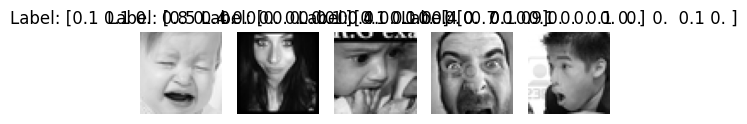

In [5]:
test_set.random_image(5)

In [6]:
val_set = ImageLoader(val_dir , val_csv)
X_val , y_val = val_set.load_data()

In [7]:
import pandas as pd

df = pd.read_csv("fer-csv/label_train.csv")

print(len(df))
#df[df['NF']==1]
df['NF'].unique()
df[df['NF']==1]


28558


,Image name,dim,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
1236,fer0001241.png,"(0, 0, 48, 48)",3,0,0,5,0,0,0,0,1,1
2369,fer0002376.png,"(0, 0, 48, 48)",5,0,0,3,0,0,0,0,1,1
2620,fer0002627.png,"(0, 0, 48, 48)",8,0,0,1,0,0,0,0,0,1
4154,fer0004170.png,"(0, 0, 48, 48)",4,0,0,4,0,0,0,0,1,1
4249,fer0004265.png,"(0, 0, 48, 48)",1,0,3,3,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26644,fer0026724.png,"(0, 0, 48, 48)",8,1,0,0,0,0,0,0,0,1
26829,fer0026909.png,"(0, 0, 48, 48)",0,0,0,0,7,0,0,0,2,1
27008,fer0027088.png,"(0, 0, 48, 48)",7,0,0,0,0,0,0,0,2,1
27222,fer0027302.png,"(0, 0, 48, 48)",6,0,0,0,0,0,0,3,0,1


In [18]:
from PIL import Image
import os



# Nome del file da aprire
file_name = "fer0013801.png"

# Percorso completo del file
file_path = os.path.join(train_dir, file_name)
img = Image.open(file_path)
img.show()

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling

In [11]:
model = Sequential()
model.add(Rescaling(1./255, input_shape=(48, 48, 1)))

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(48, 48, 1),padding='same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D((2, 2)))  

model.add(Conv2D(64, (3, 3), activation='relu',padding='same')) 
model.add(Conv2D(64, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2)))  
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Dropout(0.2))

# Step 3: Flatten the output and add Dense layers (fully connected layers)
model.add(Flatten())  # Flatten 3D output to 1D
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Output layer (10 classes, use softmax for classification)

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Suitable for integer labels
              metrics=['accuracy'])

# Step 5: Display model summary
model.summary()



c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,474 (1.66 MB)

 Trainable params: 434,474 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
print("Shape di X_train:", X_train.shape)  # Dovrebbe essere (num_samples, 48, 48, 1)
print("Shape di y_train:", y_train.shape)

Shape di X_train: (28558, 48, 48, 1)
Shape di y_train: (28558, 10)


In [12]:
history = model.fit(X_train, y_train,                  
                    epochs=5,
                    batch_size = 32,
                    validation_data=(X_val , y_val)) 

Epoch 1/5
893/893 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.3344 - loss: 1.8950 - val_accuracy: 0.5320 - val_loss: 1.5884
Epoch 2/5
893/893 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.5394 - loss: 1.6052 - val_accuracy: 0.6298 - val_loss: 1.3641
Epoch 3/5
893/893 ━━━━━━━━━━━━━━━━━━━━ 60s 67ms/step - accuracy: 0.6175 - loss: 1.4351 - val_accuracy: 0.6683 - val_loss: 1.2607
Epoch 4/5
 75/893 ━━━━━━━━━━━━━━━━━━━━ 59s 73ms/step - accuracy: 0.6570 - loss: 1.3683